<a href="https://colab.research.google.com/github/Leungy/Colab_upload/blob/master/Keras_OCR_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from __future__ import print_function

from keras.datasets import mnist

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import gzip
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import shutil
import struct
import sys

try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve

%matplotlib inline

In [6]:
# https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
def baseline_model():
	# create model
 model = Sequential()
 model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', input_shape=(28, 28,1), activation='relu'))
 model.add(BatchNormalization())
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
 model.add(BatchNormalization())
 model.add(Dense(10, activation='softmax'))
#	model.add(Dropout(0.2))
#	model.add(Flatten())
#	model.add(Dense(128, activation='relu'))
#	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
 opt = SGD(lr=0.01, momentum =0.9)
 model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 return model


In [9]:
# build the model
model = baseline_model()
# Fit the model (test has 10000, batch size =100, batch = 100, epoch=100 , total=10000)
cnn_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/100
600/600 - 2s - loss: 0.1369 - accuracy: 0.9590 - val_loss: 0.0651 - val_accuracy: 0.9807
Epoch 2/100
600/600 - 2s - loss: 0.0494 - accuracy: 0.9860 - val_loss: 0.0515 - val_accuracy: 0.9826
Epoch 3/100
600/600 - 2s - loss: 0.0302 - accuracy: 0.9915 - val_loss: 0.0401 - val_accuracy: 0.9871
Epoch 4/100
600/600 - 2s - loss: 0.0200 - accuracy: 0.9952 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 5/100
600/600 - 2s - loss: 0.0126 - accuracy: 0.9977 - val_loss: 0.0367 - val_accuracy: 0.9879
Epoch 6/100
600/600 - 2s - loss: 0.0082 - accuracy: 0.9988 - val_loss: 0.0373 - val_accuracy: 0.9882
Epoch 7/100
600/600 - 2s - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.0368 - val_accuracy: 0.9885
Epoch 8/100
600/600 - 2s - loss: 0.0042 - accuracy: 0.9997 - val_loss: 0.0369 - val_accuracy: 0.9884
Epoch 9/100
600/600 - 2s - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.0355 - val_accuracy: 0.9883
Epoch 10/100
600/600 - 2s - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0369 - val_accura

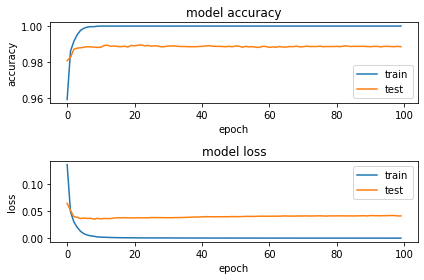

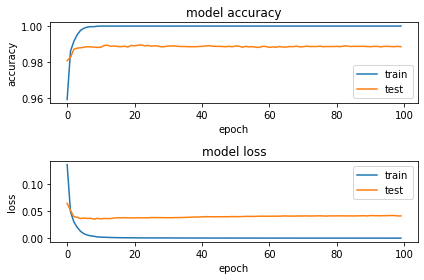

In [10]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

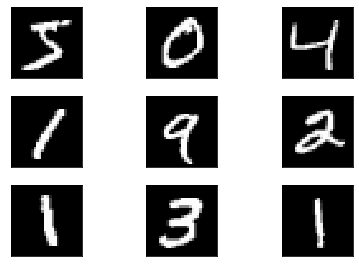

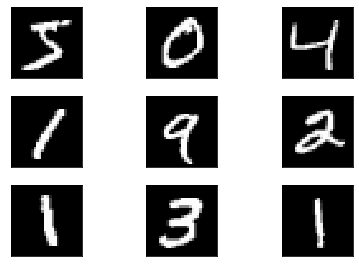

In [24]:
# Plot mnist image
fig = plt.figure()
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i].reshape((28,28)), cmap='gray', interpolation='none')
  #plt.title("Digit: {}".format(y_train[i]))  # error in title output
  plt.xticks([])
  plt.yticks([])
fig


In [31]:
# X,y train and test shape 
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28, 1)
y_train shape (60000, 10)
X_test shape (10000, 28, 28, 1)
y_test shape (10000, 10)


In [32]:
# reshape inputs from  28x28 pixels, https://nextjournal.com/gkoehler/digit-recognition-with-keras
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [33]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [35]:
print(np.unique(y_train, return_counts=True))
print("Train matrix shape", y_train.shape)
print("Test matrix shape", y_test.shape)

(array([0., 1.], dtype=float32), array([540000,  60000]))
Train matrix shape (60000, 10)
Test matrix shape (10000, 10)


In [53]:
# model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
	
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
# training the model and saving metrics in history
history = model.fit(X_train, y_train, batch_size=200, epochs=20, verbose=2, validation_data=(X_test, y_test))

Epoch 1/20
300/300 - 6s - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0646 - val_accuracy: 0.9793
Epoch 2/20
300/300 - 6s - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0644 - val_accuracy: 0.9802
Epoch 3/20
300/300 - 6s - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0642 - val_accuracy: 0.9803
Epoch 4/20
300/300 - 6s - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0671 - val_accuracy: 0.9794
Epoch 5/20
300/300 - 6s - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0628 - val_accuracy: 0.9808
Epoch 6/20
300/300 - 6s - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0637 - val_accuracy: 0.9803
Epoch 7/20
300/300 - 6s - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0640 - val_accuracy: 0.9813
Epoch 8/20
300/300 - 6s - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0626 - val_accuracy: 0.9801
Epoch 9/20
300/300 - 6s - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0662 - val_accuracy: 0.9805
Epoch 10/20
300/300 - 6s - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0649 - val_accuracy: 0.9814

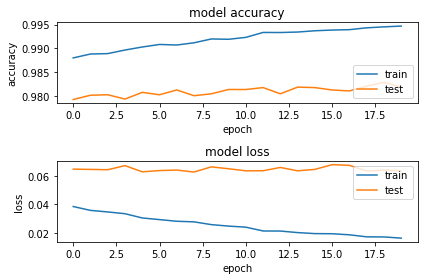

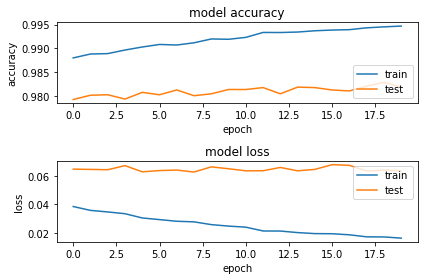

In [60]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

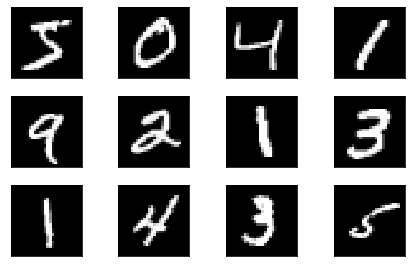

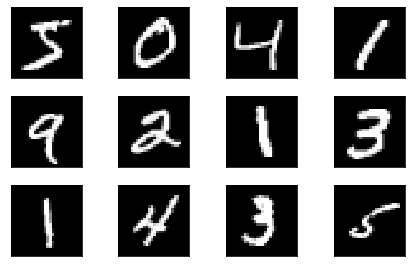

In [68]:
# Plot mnist image
fig = plt.figure()
for i in range (12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i].reshape((28,28)), cmap='gray', interpolation='none')
  #plt.title("Digit: {}".format(y_train[i]))  # error in title output
  plt.xticks([])
  plt.yticks([])
fig
